In [60]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from array import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler


def fetch_data (upto_dates = 10 , tickers='BTC-USD'):
  data = yf.download(tickers=tickers, period = f'{upto_dates}d', interval = '1d')
  new_array = np.array(data.index.to_pydatetime(), dtype=np.datetime64)
  o = data.iloc[: , 0].values
  h = data.iloc[: , 1].values
  l = data.iloc[: , 2].values
  c = data.iloc[: , 3].values
  df= pd.DataFrame(new_array)
  df.columns = ['Date']
  df['Open']=o
  df['High']=h
  df['Low']=l
  df['Close']=c
  return df

In [61]:
df=fetch_data(400)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383
1,2020-09-06,10167.216797,10353.927734,10056.885742,10280.351562
2,2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477
3,2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602
4,2020-09-09,10134.151367,10350.542969,10017.250977,10242.347656
...,...,...,...,...,...
392,2021-10-05,49174.960938,51839.984375,49072.839844,51514.812500
393,2021-10-06,51486.664062,55568.464844,50488.191406,55361.449219
394,2021-10-07,55338.625000,55338.625000,53525.468750,53805.984375
395,2021-10-08,53802.144531,55922.980469,53688.054688,53967.847656


In [62]:

cols =['Close']

In [63]:
df_for_training = df[cols].astype(float)
print(df_for_training.shape)
df_for_training.head(7)

(397, 1)


,Close
0,10169.567383
1,10280.351562
2,10369.563477
3,10131.516602
4,10242.347656
5,10363.138672
6,10400.915039


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [65]:
trainX = []
trainY = []
n_past = 10
for i in range(n_past, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i , 0])   # predict only open for next day

trainX = np.array(trainX)
trainY = np.array(trainY)
print('shape of trainx is :',trainX.shape)
print('shape of trainy is :',trainY.shape)

shape of trainx is : (387, 10, 1)
shape of trainy is : (387,)


In [66]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 256)           264192    
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 128)           197120    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 10, 64)            49408     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [67]:
history = model.fit(trainX, trainY, epochs=500,  validation_split=0.1, verbose=1)


Epoch 1/500
11/11 [==============================] - 9s 178ms/step - loss: 0.1605 - val_loss: 0.0402
Epoch 2/500
11/11 [==============================] - 0s 44ms/step - loss: 0.0348 - val_loss: 0.0135
Epoch 3/500
11/11 [==============================] - 0s 43ms/step - loss: 0.0204 - val_loss: 0.0079
Epoch 4/500
11/11 [==============================] - 1s 47ms/step - loss: 0.0117 - val_loss: 0.0073
Epoch 5/500
11/11 [==============================] - 0s 47ms/step - loss: 0.0114 - val_loss: 0.0076
Epoch 6/500
11/11 [==============================] - 0s 45ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 7/500
11/11 [==============================] - 1s 47ms/step - loss: 0.0084 - val_loss: 0.0068
Epoch 8/500
11/11 [==============================] - 0s 46ms/step - loss: 0.0108 - val_loss: 0.0073
Epoch 9/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0092 - val_loss: 0.0069
Epoch 10/500
11/11 [==============================] - 0s 43ms/step - loss: 0.0103 - val_loss: 0.007

Epoch 82/500
11/11 [==============================] - 1s 50ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 83/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0036 - val_loss: 0.0053
Epoch 84/500
11/11 [==============================] - 0s 42ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 85/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 86/500
11/11 [==============================] - 1s 46ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 87/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 88/500
11/11 [==============================] - 0s 45ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 89/500
11/11 [==============================] - 0s 45ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 90/500
11/11 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 91/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0030 - val_los

11/11 [==============================] - 1s 47ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 163/500
11/11 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 164/500
11/11 [==============================] - 1s 47ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 165/500
11/11 [==============================] - 1s 47ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 166/500
11/11 [==============================] - 0s 43ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 167/500
11/11 [==============================] - 0s 44ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 168/500
11/11 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 169/500
11/11 [==============================] - 1s 52ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 170/500
11/11 [==============================] - 0s 42ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 171/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0025 - val_loss: 0

11/11 [==============================] - 9s 853ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 243/500
11/11 [==============================] - 1s 64ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 244/500
11/11 [==============================] - 1s 63ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 245/500
11/11 [==============================] - 1s 68ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 246/500
11/11 [==============================] - 1s 60ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 247/500
11/11 [==============================] - 1s 63ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 248/500
11/11 [==============================] - 1s 57ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 249/500
11/11 [==============================] - 1s 52ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 250/500
11/11 [==============================] - 1s 51ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 251/500
11/11 [==============================] - 1s 56ms/step - loss: 0.0018 - val_loss: 

11/11 [==============================] - 1s 51ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 323/500
11/11 [==============================] - 1s 52ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 324/500
11/11 [==============================] - 1s 55ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 325/500
11/11 [==============================] - 1s 54ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 326/500
11/11 [==============================] - 1s 46ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 327/500
11/11 [==============================] - 1s 53ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 328/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 329/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 330/500
11/11 [==============================] - 1s 47ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 331/500
11/11 [==============================] - 1s 61ms/step - loss: 0.0020 - val_loss: 0

11/11 [==============================] - 1s 53ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 403/500
11/11 [==============================] - 1s 51ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 404/500
11/11 [==============================] - 1s 57ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 405/500
11/11 [==============================] - 1s 54ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 406/500
11/11 [==============================] - 1s 53ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 407/500
11/11 [==============================] - 1s 50ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 408/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 409/500
11/11 [==============================] - 1s 51ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 410/500
11/11 [==============================] - 1s 54ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 411/500
11/11 [==============================] - 1s 52ms/step - loss: 0.0017 - val_loss: 0

11/11 [==============================] - 1s 50ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 483/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 484/500
11/11 [==============================] - 1s 48ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 485/500
11/11 [==============================] - 1s 51ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 486/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 487/500
11/11 [==============================] - 1s 49ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 488/500
11/11 [==============================] - 1s 52ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 489/500
11/11 [==============================] - 1s 51ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 490/500
11/11 [==============================] - 1s 53ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 491/500
11/11 [==============================] - 1s 53ms/step - loss: 0.0022 - val_loss: 0

[*********************100%***********************]  1 of 1 completed
[42843.80078125 40693.67578125 43574.5078125  44895.09765625
 42839.75       42716.59375    43208.5390625  42235.73046875
 41034.54296875 41564.36328125 43790.89453125 48116.94140625
 47711.48828125 48199.953125   49112.90234375 51514.8125
 55361.44921875 53805.984375   53967.84765625 54429.55859375]
10
 Output is : 0.6025930047035217
 Output is : 0.623598039150238
 Output is : 0.6498566269874573
 Output is : 0.6681566834449768
 Output is : 0.693082332611084
 Output is : 0.7134738564491272
 Output is : 0.735211968421936
 Output is : 0.7517982125282288
 Output is : 0.7700819969177246
 Output is : 0.7871765494346619
[42293.07455194526, 43414.15399915894, 44815.62578497472, 45792.33530808537, 47122.66557055013, 48211.00076610473, 49371.20598337136, 50256.44601576467, 51232.28706703009, 52144.65650563623]


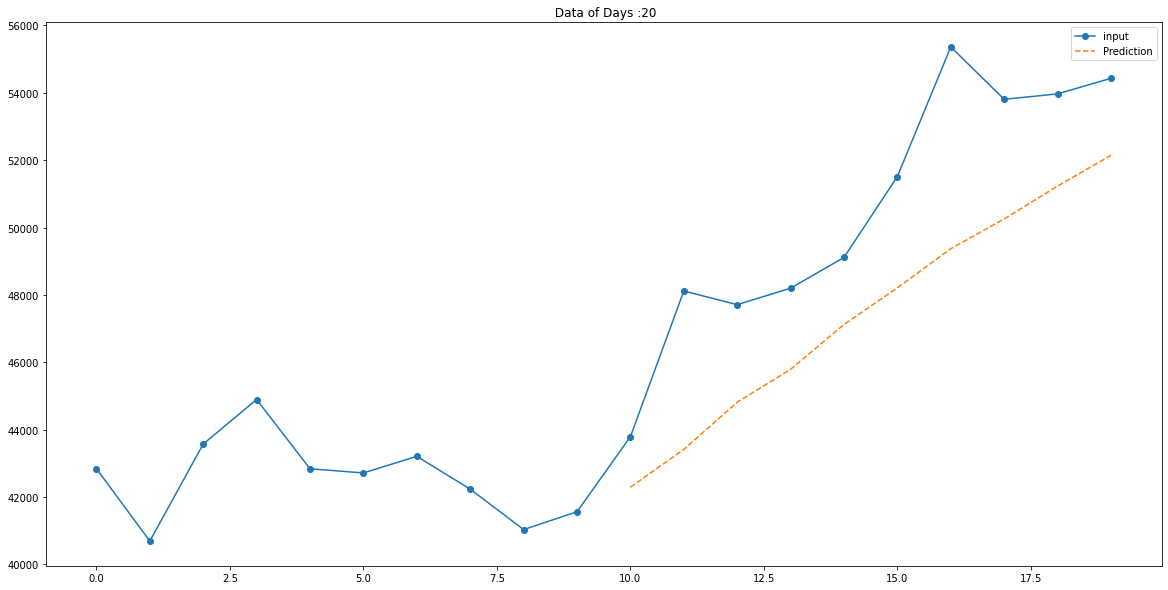

In [68]:
df=fetch_data(20)
data =df['Close']
data = np.array(data)
print(data)

data1= data[:10]

input_data =data1
data_scaled = data1.reshape((n_past,1))
print(len(data_scaled))
data_scaled = scaler.transform(data_scaled).tolist()
out_data = []
i=0
ran = len(data)-10


while(i<ran):
  x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
  x_input=np.array(x_input).reshape((1,n_past,1))
  y_pred = model.predict(x_input)[0][0]
  print(f" Output is : {y_pred}")
  actual_p =scaler.inverse_transform([[y_pred]]).tolist()
  out_data.append(actual_p[0][0])
  data_scaled.append([y_pred])
  i=i+1
print(out_data)
plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(data)),data, label='input', marker='o')
plt.plot(np.arange(10,len(data)),out_data ,label='Prediction', linestyle='dashed')
plt.title(f" Data of Days :{len(data)}")
plt.legend()

In [69]:
# df=fetch_data(10)
# data =df['Open']
# data = np.array(data)
# data1= data[len(data)-n_past:]

# input_data =data1
# data_scaled = data1.reshape((n_past,1))
# data_scaled = scaler.transform(data_scaled).tolist()
# out_data = []
# i=0

# while(i<10):
#   x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
#   x_input=np.array(x_input).reshape((1,n_past,1))
#   y_pred = model.predict(x_input)[0][0]
#   print(f" Output is : {y_pred}")
  
#   out_data.append(scaler.inverse_transform([y_pred])[0])
#   data_scaled.append([y_pred])
#   i=i+1
# plt.figure(figsize=(20,10))
# plt.plot(np.arange(0,len(data)),data, label='input')
# plt.plot(np.arange(len(data),len(data)+i),out_data ,label='Prediction')
# plt.title(f" Data of hours :{len(data)}")
# plt.legend()

In [70]:
len(data)

20

In [71]:
[[0.36246806383132935]]

[[0.36246806383132935]]